In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('train.csv')    #shape: (891, 12)

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Dictionary

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [208]:
df.shape

(889, 20)

In [263]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0,1,0,1,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,0,1,1,0,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0,0,1,0,1,Mr.


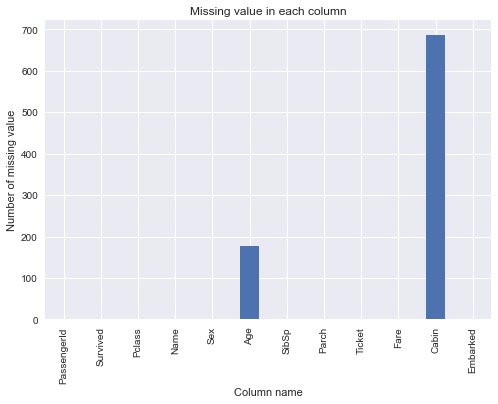

In [170]:
df.isnull().sum().plot.bar()
plt.xlabel('Column name')
plt.ylabel('Number of missing value')
plt.title('Missing value in each column')
plt.show()

Cabin column has the most NaN values, and has 687 missing value.

In [57]:
df.loc[df['Embarked'].isnull() == True, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [3]:
df = df[~df['Embarked'].isnull() == True]

In [4]:
df.at[df['Cabin'].isnull() == True, 'Cabin'] = '¯\(ツ)/¯'

In [ ]:
# df['Cabin'][df['Cabin'].isnull()] = '¯\(ツ)/¯'

In [5]:
# There are two columns that pertain to how many family members are on the boat for a given person.
# Create a new column called FamilyCount which will be the sum of those two columns.
df['FamilyCount'] = df['SibSp'] + df['Parch']

In [6]:
# Reverends have a special title in their name. Create a column called IsReverend: 
# 1 if they're a preacher, 0 if they're not.
df['IsReverend'] = df['Name'].str.contains('Rev').astype(int)

In [7]:
# In order to feed our training data into a classification algorithm, 
# convert our categories into 1's and 0's using pd.get_dummies
embarked_dumm = pd.get_dummies(df['Embarked'], prefix='Embarked')

In [4]:
embarked_dumm.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [8]:
df = pd.concat([df, embarked_dumm], axis=1)

In [9]:
# Get dummies for sex column
sex_dumm = pd.get_dummies(df['Sex'], prefix='Sex')

In [10]:
df = pd.concat([df, sex_dumm], axis=1)

In [11]:
# find the title in the name value
name_value = [df['Name'].values[i].split(',')[1] for i in range(len(df['Name']))]

df['title'] = [name_value[i].split()[0] for i in range(len(name_value))]

In [265]:
df['title'].value_counts()

Mr.          517
Miss.        181
Mrs.         124
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
the            1
Jonkheer.      1
Don.           1
Sir.           1
Mme.           1
Ms.            1
Lady.          1
Capt.          1
Name: title, dtype: int64

In [209]:
#title_dumm = pd.get_dummies(df['title'], prefix='title')

In [180]:
#df = pd.concat([df, title_dumm], axis=1)

In [12]:
# What was the survival rate overall?
total = df['Survived'].count()
survive = df[df['Survived'] == 1].count()['Survived']
survival_rate_overall = survive/total
print('overall survival rate: ', survival_rate_overall)

overall survival rate:  0.382452193476


In [275]:
# Which gender fared the worst? What was their survival rate?
gender = df.groupby('Sex')['Survived'].count()
gender_survive = df[df['Survived'] == 1].groupby('Sex')['Survived'].count()
gender_survive_rate = gender_survive/gender
print(gender_survive_rate)

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64


In [117]:
# What was the survival rate for each Pclass?
pclass = df.groupby('Pclass')['Survived'].count()
pclass_survive = df[df['Survived'] == 1].groupby('Pclass')['Survived'].count()
pclass_survive_rate = pclass_survive/pclass
print(pclass_survive_rate)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [267]:
# Did any reverends survive? How many? 1 is reverend
reverend = df.groupby('IsReverend')['Survived'].count()
reverend_survive = df[df['Survived'] == 1].groupby('IsReverend')['Survived'].count()
reverend_survive_rate = reverend_survive/reverend
print(reverend_survive_rate)

IsReverend
0    0.385051
1         NaN
Name: Survived, dtype: float64


In [274]:
# What is the survival rate for cabins marked ¯\(ツ)/¯
cabin_na = df[df['Cabin'] == '¯\(ツ)/¯'].count()['Cabin']
cabin_na_survive = df[df['Survived'] == 1][df['Cabin'] == '¯\(ツ)/¯'].count()['Cabin']
cabin_na_survive_rate = cabin_na_survive/cabin_na
print(cabin_na_survive_rate)

0.299854439592


/Users/fmeng90/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [49]:
# What is the survival rate for people whose Age is empty?
age_na_survive = df[df['Age'].isnull() == True].groupby('Survived').count().loc[1,'PassengerId']
age_na = df[df['Age'].isnull() == True]['PassengerId'].count()
age_na_survive_rate = age_na_survive/age_na

In [276]:
# What is the survival rate for each port of embarkation?
port = df.groupby('Embarked')['Survived'].count()
port_survive = df[df['Survived']==1].groupby('Embarked')['Survived'].count()
port_survive_rate = port_survive/port
print(port_survive_rate)

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [150]:
# What is the survival rate for children (under 12) in each Pclass?
inder12_pcalss = df[df['Age']<12].groupby('Pclass').count()['Age'] 
inder12_pcalss_survive = df[df['Age']<12][df['Survived']==1].groupby('Pclass').count()['PassengerId']
inder12_pcalss_survive_rate = inder12_pcalss_survive/inder12_pcalss
print(inder12_pcalss_survive_rate)

Pclass
1    0.750000
2    1.000000
3    0.404255
dtype: float64


/Users/fmeng90/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [264]:
# Did the captain of the ship survive? Is he on the list?
df.loc[df['title'].str.contains('Capt'),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,title
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,0,0,0,1,0,1,Capt.


In [168]:
# Of all the people that died, who had the most expensive ticket? How much did it cost?
pd.DataFrame(df[df['Survived'] == 0].set_index('Name')['Fare'].sort_values(ascending=False)).iloc[:10,:]

,Fare
Name,
"Fortune, Mr. Charles Alexander",263.0000
"Fortune, Mr. Mark",263.0000
"Baxter, Mr. Quigg Edmond",247.5208
"Robbins, Mr. Victor",227.5250
"Farthing, Mr. John",221.7792
"Widener, Mr. Harry Elkins",211.5000
"Graham, Mr. George Edward",153.4625
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",151.5500
"Allison, Miss. Helen Loraine",151.5500


In [304]:
# Does having family on the boat help or hurt your chances of survival?
family = df.groupby('Survived').count()['FamilyCount']
no_family_survive = df[df['FamilyCount'] == 0].groupby('Survived').count()['FamilyCount']
family_survive = df[df['FamilyCount'] != 0].groupby('Survived').count()['FamilyCount']

no_family_survive_rate = no_family_survive/df[df['FamilyCount'] == 0].count()['FamilyCount']  #number of no_family survive/total no_family
family_survive_rate = family_survive/df[df['FamilyCount'] != 0].count()['FamilyCount']
print(no_family_survive_rate, family_survive_rate)

Survived
0    0.699065
1    0.300935
Name: FamilyCount, dtype: float64 Survived
0    0.49435
1    0.50565
Name: FamilyCount, dtype: float64


In [294]:
%matplotlib inline

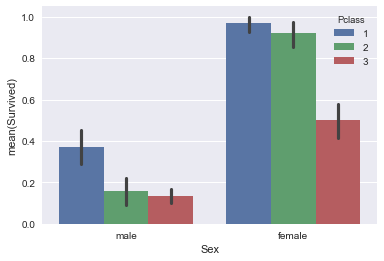

In [295]:
sns.barplot(x='Sex', y='Survived', data=df, hue='Pclass')

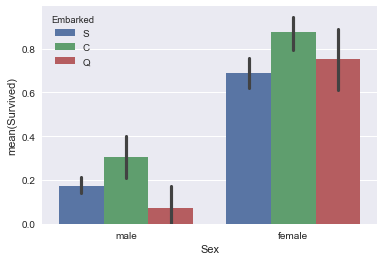

In [306]:
sns.barplot(x='Sex', y='Survived', data=df, hue='Embarked')